In [73]:
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
# カテゴリーのリスト
categories = ['mystery', 'manga', 'literature', 'busyness', 'education']
# 結果を保存するための辞書
partial_matches_results = {}

In [75]:
# 各カテゴリーについて処理
for category in categories:
    # 対応するファイルを読み込む
    amazon_file_path = f'/Users/cider/Desktop/dsproen/data/amazon_{category}.csv'
    local_file_path = f'/Users/cider/Desktop/dsproen/local/{category}.csv'

    amazon_df = pd.read_csv(amazon_file_path)
    local_df = pd.read_csv(local_file_path)

    # タイトルの列を抽出
    amazon_titles = set(amazon_df.iloc[:, 0])
    local_titles = set(local_df.iloc[:, 0])

    # 部分一致を検索
    partial_matches = set()
    for local_title in local_titles:
        for amazon_title in amazon_titles:
            if local_title in amazon_title:
                partial_matches.add((local_title, amazon_title))

    # 部分一致するタイトルの数をカウント
    number_of_partial_matches = len(partial_matches)

    # 結果を保存
    partial_matches_results[category] = {
        'number_of_partial_matches': number_of_partial_matches,
        'partial_matches': partial_matches
    }

In [76]:
# 結果を整形して出力
for category, results in partial_matches_results.items():
    print(f"Category: {category}")
    print(f"一致数: {results['number_of_partial_matches']}")
    if results['partial_matches']:
        print("一致タイトル:")
        for match in results['partial_matches']:
            print(f" - {match[0]} => {match[1]}")
    else:
        print("一致なし")
    print()  # 空行を挿入して区切る


Category: mystery
一致数: 2
一致タイトル:
 - 可燃物 => 可燃物 (文春e-book)
 - あなたが誰かを殺した => あなたが誰かを殺した

Category: manga
一致数: 7
一致タイトル:
 - 呪術廻戦 => 呪術廻戦 24 (ジャンプコミックスDIGITAL)
 - SPY×FAMILY => SPY×FAMILY Season 2
 - 転生したらスライムだった件 => 転生したらスライムだった件（２５） (シリウスコミックス)
 - WIND BREAKER => WIND BREAKER(15) (講談社コミックス)
 - 変な家 => 変な家: 1 (HOWLコミックス)
 - 黄泉のツガイ => 黄泉のツガイ 6巻特装版 小冊子付き (デジタル版ガンガンコミックス)
 - 推しの子 => 【推しの子】 13 (ヤングジャンプコミックスDIGITAL)

Category: literature
一致数: 0
一致なし

Category: busyness
一致数: 4
一致タイトル:
 - 頭のいい人が話す前に考えていること => 頭のいい人が話す前に考えていること
 - 神時間力 => 神時間力
 - スキル => 入社1年目のビジネススキル大全 (単行本)
 - とにかく仕組み化 => とにかく仕組み化 ── 人の上に立ち続けるための思考法

Category: education
一致数: 0
一致なし



In [77]:
#すっくな...一応可視化してみる

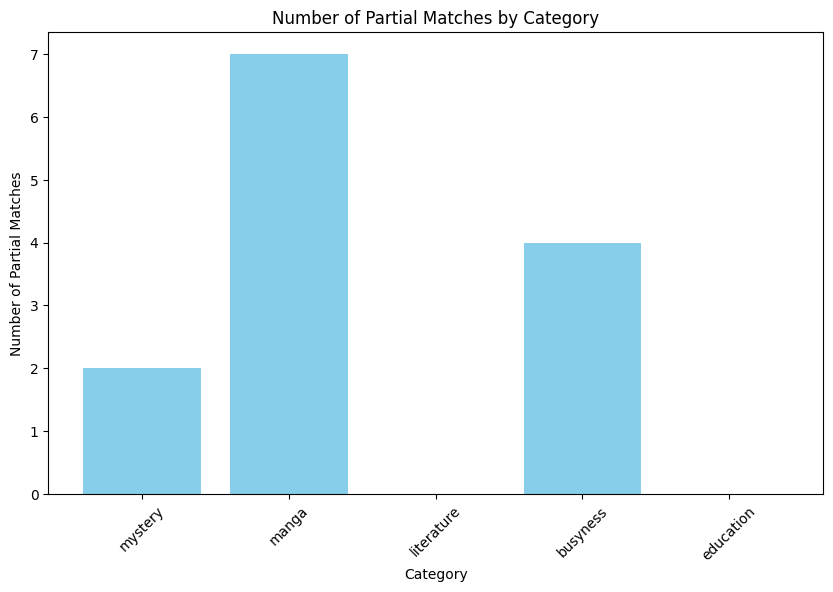

In [78]:
# 結果からカテゴリーごとの部分一致するタイトルの数を取得
categories = list(partial_matches_results.keys())
partial_matches_counts = [results['number_of_partial_matches'] for results in partial_matches_results.values()]

# 可視化
plt.figure(figsize=(10, 6))
plt.bar(categories, partial_matches_counts, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Partial Matches')
plt.title('Number of Partial Matches by Category')
plt.xticks(rotation=45)
plt.show()